# Task
Perform linear regression on the dataset located at "/content/sample_data/california_housing_train.csv" step by step.

## Load the data

### Subtask:
Load the data from `/content/sample_data/california_housing_train.csv` into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame, then display the head and info to inspect the data.



In [1]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
display(df.head())
display(df.info())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


None

## Prepare the data

### Subtask:
Select the features and target variable for linear regression. Handle missing values and categorical variables if necessary.


**Reasoning**:
Select the features and target variable for linear regression, as instructed.



In [2]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

display(X.head())
display(y.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using `train_test_split` and print the shapes of the resulting sets.



In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (13600, 8)
Shape of X_test: (3400, 8)
Shape of y_train: (13600,)
Shape of y_test: (3400,)


## Build the model

### Subtask:
Train a linear regression model on the training data.


**Reasoning**:
Train a linear regression model on the training data using the instructions provided.



In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the model's performance on the testing data using appropriate metrics.


**Reasoning**:
Evaluate the trained model using the test set and calculate the MSE and R-squared scores.



In [5]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 4634658406.223264
R-squared (R2) Score: 0.6636396350243869


## Visualize the results

### Subtask:
Visualize the regression results, such as plotting the predicted vs actual values.


**Reasoning**:
Visualize the actual vs predicted values using a scatter plot and a diagonal line for comparison.



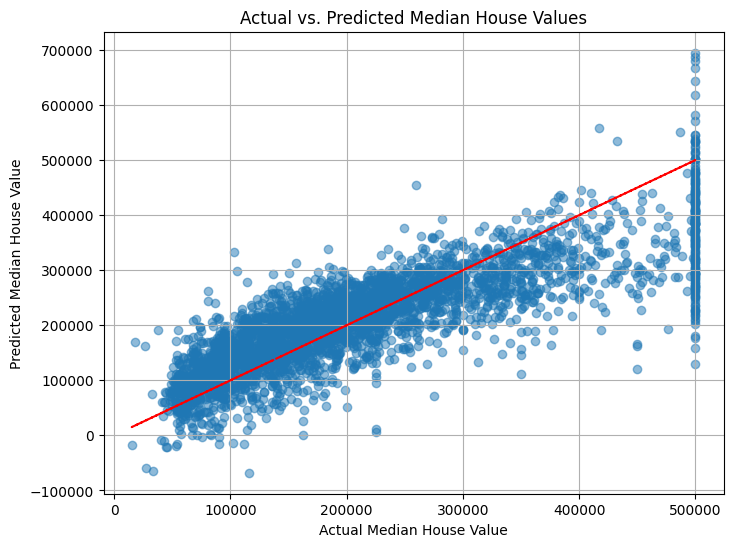

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Values")
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 17000 rows and 9 columns, with no missing values in the columns examined.
*   The linear regression model was trained using 8 features to predict the `median_house_value`.
*   The data was split into training (13600 samples) and testing (3400 samples) sets.
*   The model achieved a Mean Squared Error (MSE) of approximately \$4.635 \times 10^9$ on the test set.
*   The R-squared score on the test set was approximately 0.664, indicating that the model explains about 66.4% of the variance in the median house values.
*   A scatter plot of actual vs. predicted values visually shows the model's performance.

### Insights or Next Steps

*   The current R-squared score of 0.664 suggests that there is room for improvement in the model's predictive power. Further feature engineering or using more complex models could potentially increase the variance explained.
*   Analyzing the coefficients of the linear regression model could provide insights into the relationship between individual features and the median house value.
